# Big Data (UBA) -  2024

## Trabajo Práctico 2 

### Grupo 2
- Jimena Teran 
- Juan Lynch
- Renzo Falciglia

### Parte I: Limpieza de la base

#### Ejercicio 1
En esta primera parte realizamos un análisis de la base de datos, de sus variables y características. Luego, realizamos una *"limpieza"* de los datos, de tal manera de prepararlos para poder realizar posteriormente las estimaciones necesarias. En cada bloque de código se explica el análisis o las transformaciones que le realizamos a los datos.

Luego del análisis descriptivo, se eliminan los valores duplicados y los valores nulos y NAs, para que no afecten el análisis. A su vez, como lo solicita la consigna, trabajamos con las variables *Neighbourhood_group* y con *room_type*. Estas dos variables son categóricas y describen el grupo en el que se encuentra el barrio y el "tipo" de habitación que tiene el alojamiento. A partir de las transformaciones realizadas, estas variables categóricas se codifican como numéricas.

En el caso de los NA'S de la variable *reviews_per_month*, tomamos la decisión de reemplazarlos por la mediana agrupando por *neighbourhood_group_encoded*. Suponemos que los alojamientos dentro de un mismo barrio tendrán precios similares entre sí.

También eliminamos las columnas que no son de interés para el análisis que realizamos. Específicamente, se eliminas las columnas de 'id', 'name', 'neighbourhood_group','room_type', 'last_review', 'host_name' y 'availability_365'.

Por último, analizamos la distribución de nuestra variable de interés *price*, y detectamos que hay pocas observaciones con un precio mayor a USD 6.000, por lo que decidimos excluir estas observaciones del análisis.

In [51]:
#Importamos paquetes y cargamos los datos
#pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Carga el archivo CSV en un DataFrame
df = pd.read_csv('Base Airbnb NY.csv')

In [52]:
#Analizamos la estructura básica de los datos

#Primeras filas
print(df.head(5))

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  20

In [53]:
#Información general 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48905 entries, 0 to 48904
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48905 non-null  int64  
 1   name                            48889 non-null  object 
 2   host_id                         48905 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48905 non-null  object 
 5   neighbourhood                   48905 non-null  object 
 6   latitude                        48905 non-null  float64
 7   longitude                       48905 non-null  float64
 8   room_type                       48905 non-null  object 
 9   price                           48890 non-null  float64
 10  minimum_nights                  48905 non-null  int64  
 11  number_of_reviews               48905 non-null  int64  
 12  last_review                     

In [16]:
#Análisis de estadística descriptiva
df.describe(include ='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48905.0,NaN,NaN,NaN,19016965.555117,10982979.600428,2539.0,9471997.0,19677284.0,29151631.0,36487245.0
name,48889,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48905.0,NaN,NaN,NaN,67616706.345629,78608248.004435,2438.0,7822683.0,30791331.0,107434423.0,274321313.0
host_name,48884,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48905,5,Manhattan,21668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48905,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48905.0,NaN,NaN,NaN,40.728949,0.054529,40.49979,40.6901,40.72308,40.76312,40.91306
longitude,48905.0,NaN,NaN,NaN,-73.952172,0.046153,-74.24442,-73.98307,-73.95568,-73.93628,-73.71299
room_type,48905,3,Entire home/apt,25414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48890.0,NaN,NaN,NaN,152.725036,240.164523,0.0,69.0,106.0,175.0,10000.0


In [54]:
#Valores nulos y duplicados
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10053
reviews_per_month                 10053
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [55]:
#Creamos las columnas neighbourhood_group & room_type pero numéricas, como pide la consigna:

df['neighbourhood_group_encoded'] = df['neighbourhood_group'].astype('category').cat.codes
df['room_type_encoded'] = df['room_type'].astype('category').cat.codes

df[['neighbourhood_group_encoded', 'neighbourhood_group', 'room_type', 'room_type_encoded']].head(5) #Vemos cómo quedan estas columnas

,neighbourhood_group_encoded,neighbourhood_group,room_type,room_type_encoded
0,1,Brooklyn,Private room,1
1,2,Manhattan,Entire home/apt,0
2,2,Manhattan,Private room,1
3,1,Brooklyn,Entire home/apt,0
4,2,Manhattan,Entire home/apt,0


In [56]:
#Antes de eliminar duplicados, tomamos la decisión de eliminar NA'S de la columna 'price' porque son pocos y es nuestra variable objetivo. Para los NA'S
#de reviews_per_month los reemplazamos por la mediana agrupando por 'neighbourhood_group_encoded' (porque suponemos que cada barrio va a tener precios más
#parecidos entre sí. Variables 'name', 'host name' y 'last review' las vamos a dropear después.

df = df.dropna(subset=['price'])

df['reviews_per_month'] = df.groupby('neighbourhood_group_encoded')['reviews_per_month'].transform(lambda x: x.fillna(x.median()))


In [57]:
#Se eliminan los valores duplicados
df = df.drop_duplicates()

#Se eliminan las columnas que no son de interés para predecir el precio. 
columnas_a_eliminar = ['id', 'name', 'last_review', 'host_name']
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

#Imprimimos el df con estos cambios 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48880 non-null  int64  
 1   neighbourhood_group             48880 non-null  object 
 2   neighbourhood                   48880 non-null  object 
 3   latitude                        48880 non-null  float64
 4   longitude                       48880 non-null  float64
 5   room_type                       48880 non-null  object 
 6   price                           48880 non-null  float64
 7   minimum_nights                  48880 non-null  int64  
 8   number_of_reviews               48880 non-null  int64  
 9   reviews_per_month               48880 non-null  float64
 10  calculated_host_listings_count  48880 non-null  int64  
 11  availability_365                48880 non-null  int64  
 12  neighbourhood_group_encoded     48880

In [58]:
#Evaluamos la variable 'availability_365':

(df.availability_365.value_counts()/df.shape[0])*100

availability_365
 0      35.857201
 365     2.649345
 364     1.004501
 1       0.834697
 89      0.736498
          ...    
 183     0.049100
 196     0.049100
 181     0.047054
 202     0.040917
-999     0.030687
Name: count, Length: 367, dtype: float64

In [59]:
#También eliminamos 'availability_365' porque tiene 35% de ceros y varios -999
#ya nos parece que está muy sucia. Decidimos dejar las filas con ceros porque son demasiadas:

df = df.drop('availability_365', axis=1)

In [60]:
#Ahora sí, nos centramos en la variable objetivo:

df.price.describe()

count    48880.000000
mean       152.732140
std        240.187672
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [61]:
#Ordenamos de mayor a menor por precio para ver valores muy altos. También queremos deshacernos de los precios = 0. (O sea, no quermos precios demasiado
#altos, ni NA'S (que ya eliminamos), ni precio = 0:

df.sort_values('price', ascending=False).head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,neighbourhood_group_encoded,room_type_encoded
9151,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000.0,100,2,0.04,1,3,1
17692,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000.0,5,5,0.16,1,1,0
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000.0,30,0,0.61,1,2,0
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999.0,99,6,0.14,1,2,1
6530,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999.0,5,1,0.02,1,2,0
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999.0,30,0,0.61,1,2,0
30268,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500.0,30,2,0.18,1,2,0
4377,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000.0,1,1,0.03,11,1,0
29662,156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703.0,1,0,0.61,12,2,0
45666,262534951,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500.0,1,8,6.15,2,1,1


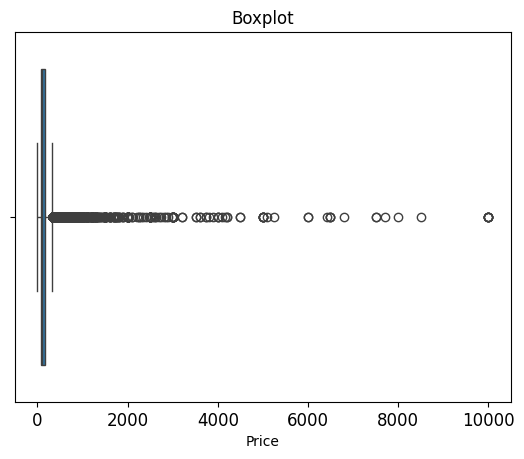

In [62]:
#Evaluamos la distribución de la variable price

sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Boxplot')
plt.show()

In [63]:
#Elminamos filas con precios muy altos o iguales a cero:
df = df[(df['price'] < 6000) & (df['price'] > 0)]
print(df.columns)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'neighbourhood_group_encoded',
       'room_type_encoded'],
      dtype='object')


In [64]:
#Finalmente vamos a "Con la ayuda de los comandos groupby y join o merge, creen una columna que tenga la cantidad de oferentes por
# “Neighbourhood group”. Llamen a esa nueva columna offer group"
df['offer_group'] = df.groupby('neighbourhood_group_encoded')['host_id'].transform('count')

### Parte II: Graficos y visualizaciones

En esta parte realizamos un conjunto de gráficos y visualizaciones que nos ayudan a entender los datos y a prepararnos para la estimación posterior. 

Como primer paso, realizamos una matríz de correlación con las siguientes variables **‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’**. 

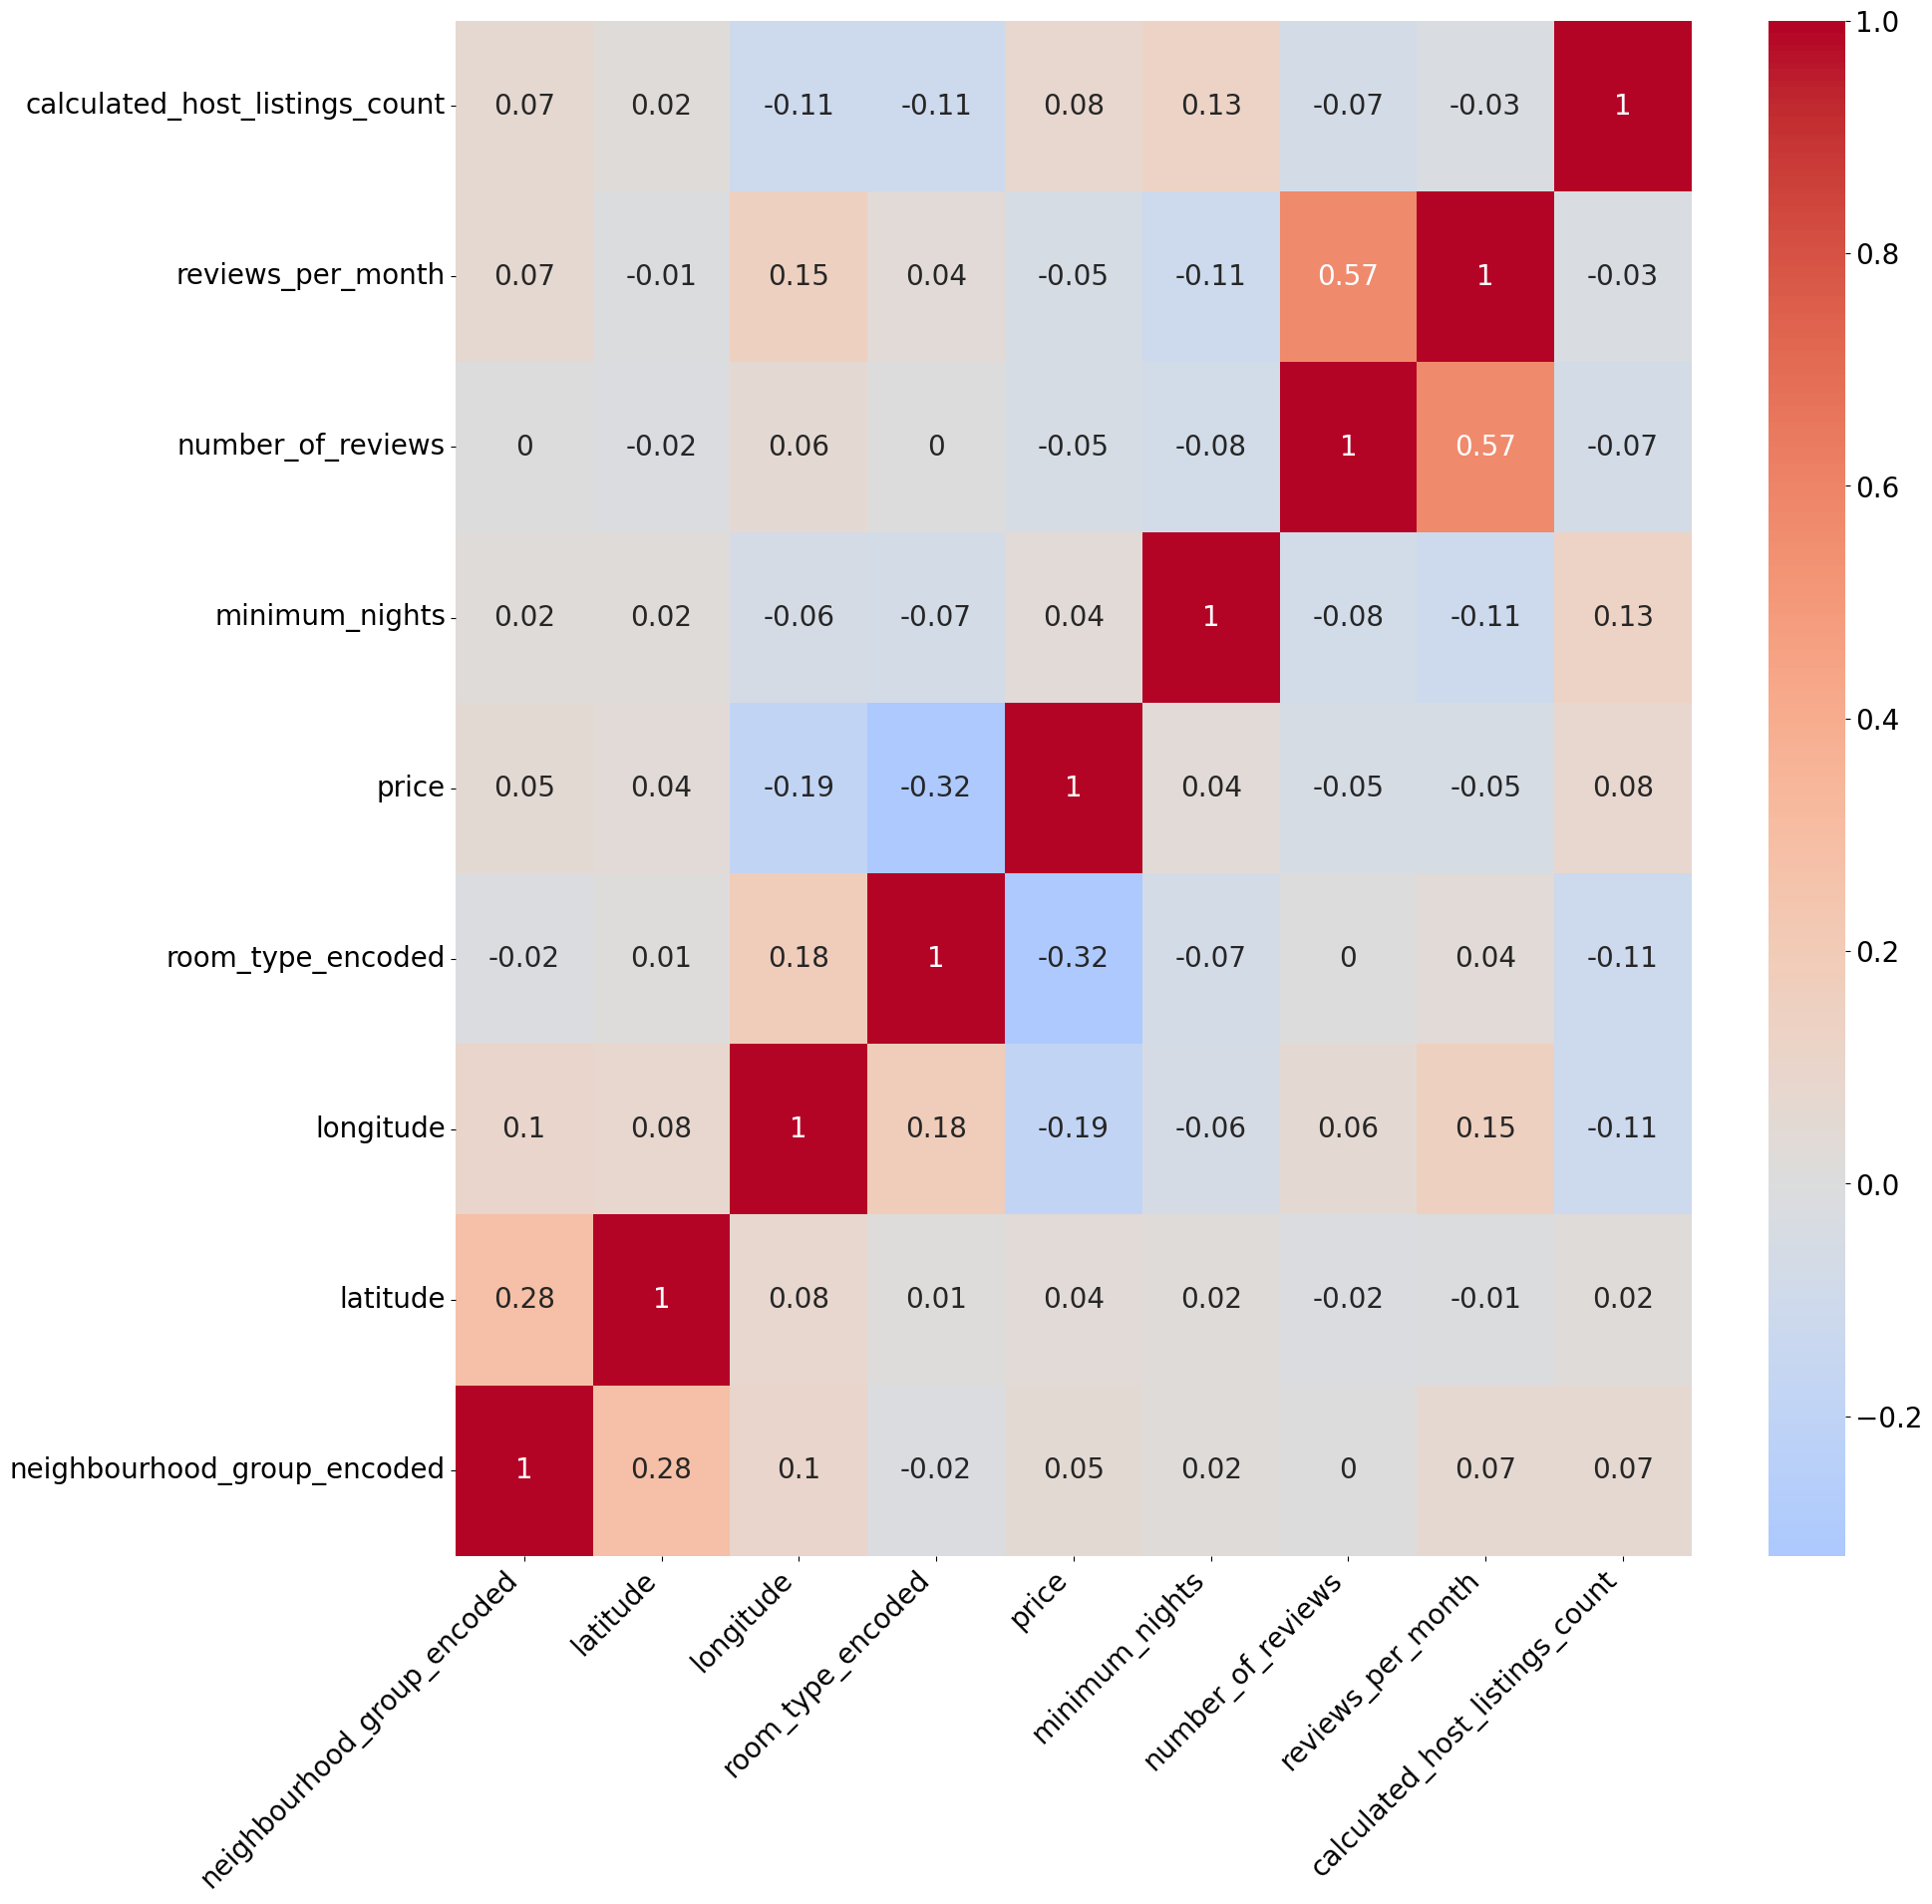

In [65]:
# Hacemos matriz de correlaciones entre todas las variables solicitadas. La unica que decidimos excluir es 'availability_365' porque no la estamos
# teniendo en cuenta para el estudio.

import matplotlib.pyplot as plt
import matplotlib

corr = df.corr

plt.figure(figsize=(20, 20))

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)


relevant_columns = ['neighbourhood_group_encoded', 'latitude', 'longitude', 'room_type_encoded', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
correlation_df = df[relevant_columns]
correlation_matrix = correlation_df.corr()


annot_font_size = 20

plot = sns.heatmap(correlation_matrix.round(2),
                   annot=True,
                   cmap='coolwarm',
                   center=0,
                   annot_kws={'size': annot_font_size})

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=20)

plot.set_ylim(0, correlation_matrix.shape[0])

plt.show()



Los resultados de esta matriz no sugieren correlaciones muy fuertes entre la variable price y el resto de las variables. Sin embargo, las variables **‘neighbourhood group’, ‘room type’** fueron incluídas de manera ordinal, de acuerdo a los números que se le asignó a cada tipo de barrio y a cada tipo de alojamiento. Esto implica que no se pueda interpretar correctamente la correlación con la variable price. 

Por lo tanto, para solucionar este problema y observar como se correlaciona la variable de tipo de barrio y de tipo de alojamiento, se utiliza la técnica de *one hot encoding*, que asigna variables binarias a cada una de las categorías de ambas variables. Luego, se realiza una matríz de correlación de la variable price junto a neighbourhood group y a room type.

                                  price  room_type_encoded_0  \
price                          1.000000             0.324918   
room_type_encoded_0            0.324918             1.000000   
room_type_encoded_1           -0.305391            -0.953507   
room_type_encoded_2           -0.067138            -0.162087   
neighbourhood_group_encoded_0 -0.050904            -0.052043   
neighbourhood_group_encoded_1 -0.122063            -0.073588   
neighbourhood_group_encoded_2  0.204718             0.159692   
neighbourhood_group_encoded_3 -0.102060            -0.108414   
neighbourhood_group_encoded_4 -0.016643            -0.008402   

                               room_type_encoded_1  room_type_encoded_2  \
price                                    -0.305391            -0.067138   
room_type_encoded_0                      -0.953507            -0.162087   
room_type_encoded_1                       1.000000            -0.142833   
room_type_encoded_2                      -0.142833         

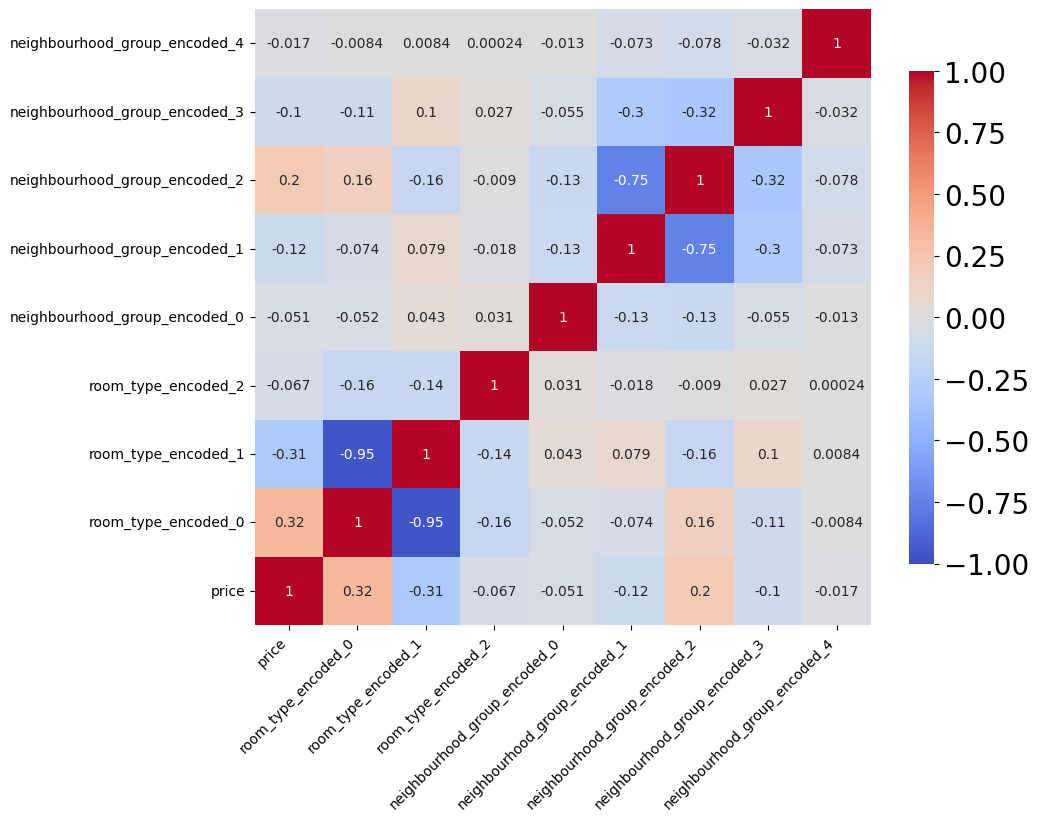

In [66]:
#Se aplica one-hot encoding a 'room type' y 'neighbourhood group'
df_encoded = pd.get_dummies(df, columns=['room_type_encoded', 'neighbourhood_group_encoded'])

#Se filtran sólo las columnas codificadas y 'price' para la matriz de correlación
variables_interes = ['price'] + [col for col in df_encoded.columns if 'room_type_encode' in col or 'neighbourhood_group_encoded' in col]
df_correlacion = df_encoded[variables_interes]

#Se calcula la matríz de correlación y se imprime
matriz_correlacion = df_correlacion.corr()
print(matriz_correlacion)

#Configuramos el nuevo gráfico de la matríz de correlación
plt.figure(figsize=(10, 8))
plot = sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=10)


plot.set_ylim(0, matriz_correlacion.shape[0])


plt.show()

In [67]:
#Para facilitar la interpretación de esta última matríz, mostramos como es la codificación de ambas variables

df[['neighbourhood_group_encoded', 'neighbourhood_group', 'room_type', 'room_type_encoded']].head(5) #Vemos cómo quedan estas columnas

,neighbourhood_group_encoded,neighbourhood_group,room_type,room_type_encoded
0,1,Brooklyn,Private room,1
1,2,Manhattan,Entire home/apt,0
2,2,Manhattan,Private room,1
3,1,Brooklyn,Entire home/apt,0
4,2,Manhattan,Entire home/apt,0


Con esta segunda matriz puede interpretarse mejor la correlación con el barrio y el tipo de habitación. Por ejemplo, se observa que tienen una correlación fuerte y positiva con el precio cuando el alojamiento es un departamento entero y cuando está ubicado en Manhattan, lo que resulta intuitivo ya que es uno de los barrios más buscados por los turistas. A su vez, se observa una correlación negativa entre el precio cuando el alojamiento se trata de una habitación dentro de una casa o departamento y cuando está ubicado en Brooklyn.

A continuación, realizamos otros gráficos de correlación para evaluar a la variable price.

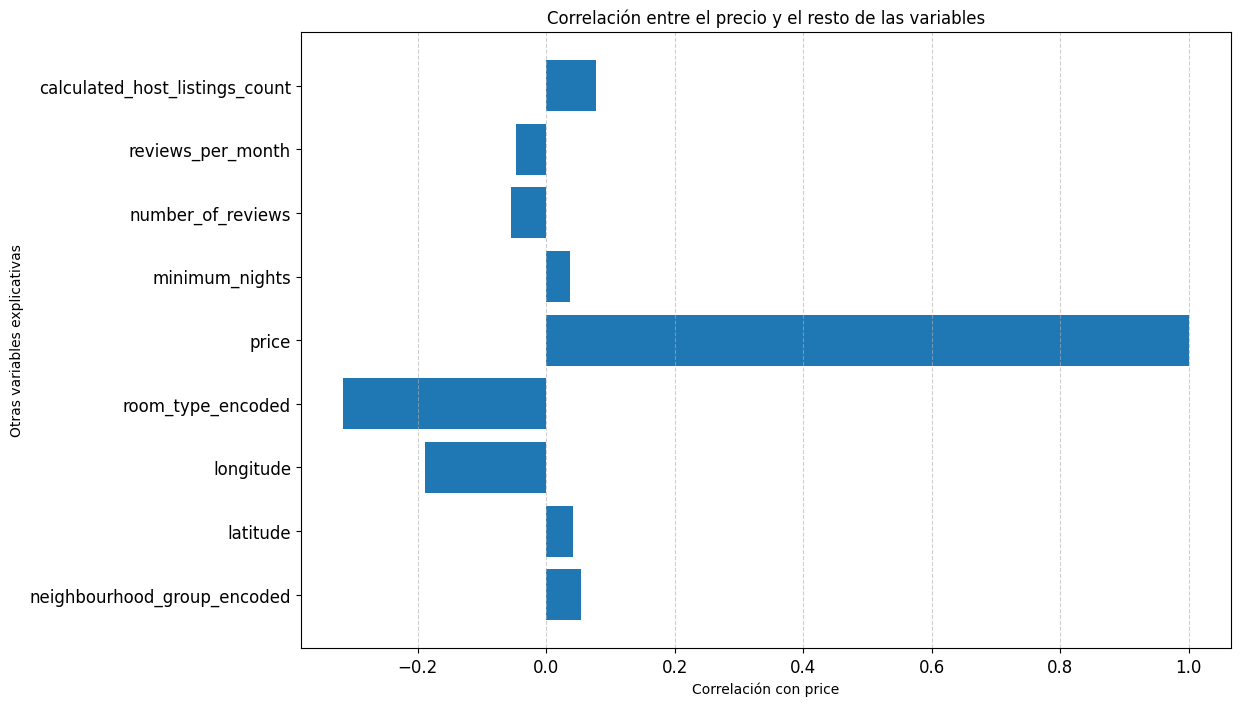

In [68]:
# Además agregamos un gráfico que muestra la correlación del precio con las demás variables. Al ser nuestra variable a predecir, mejor tenerla bien
# identificada. 

# Punto a ver --> room_type_encoded y neighbourhood_group_encoded no deberían tener un orden??

plt.figure(figsize=(12, 8))

matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

correlation_with_price = correlation_df.corrwith(df['price'])

plt.barh(correlation_with_price.index, correlation_with_price)
plt.xlabel('Correlación con price')
plt.ylabel('Otras variables explicativas')
plt.title('Correlación entre el precio y el resto de las variables')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

Ahora realizamos un análisis para responder a las siguientes preguntas: *¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación?* 

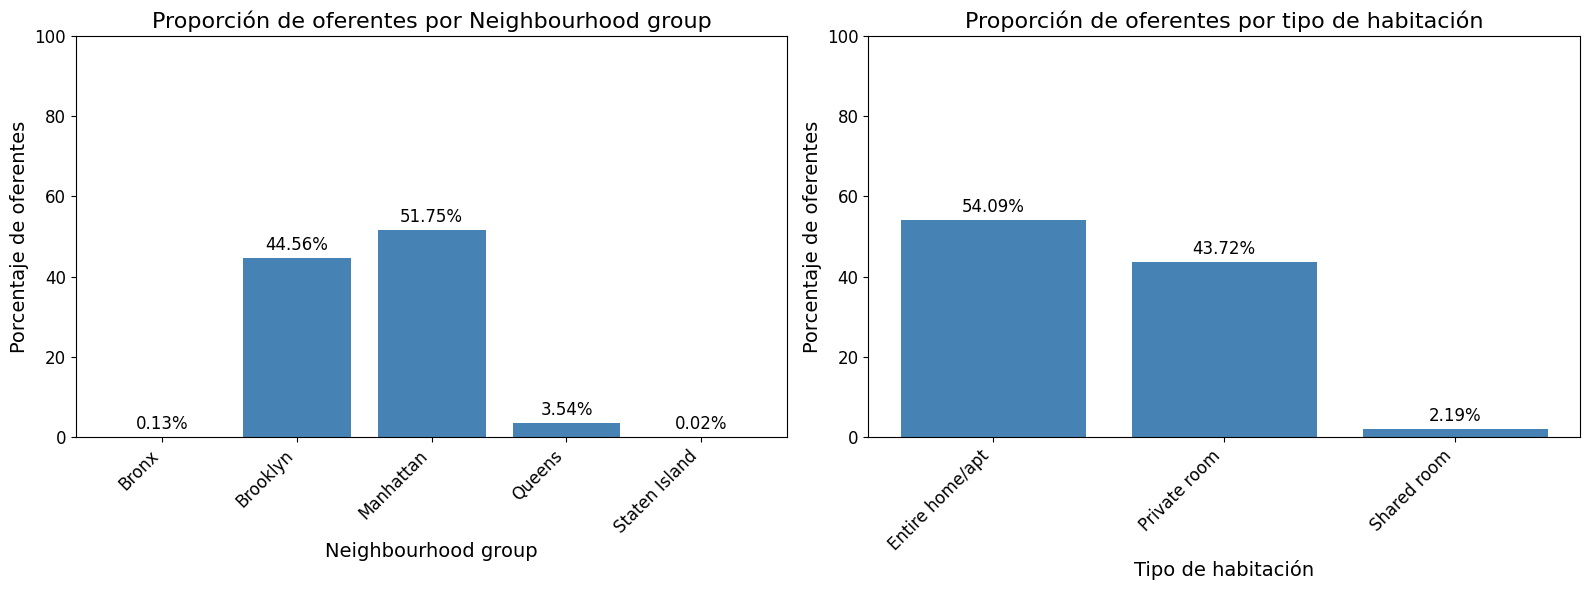

In [69]:
#Gráficos mostrando la proporción de oferente por Neighbourhood group y por tipo de habitación:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

neighborhood_group_mapping = {0: 'Bronx', 1: 'Brooklyn', 2: 'Manhattan', 3: 'Queens', 4: 'Staten Island'}
offer_group_by_neighborhood = df.groupby('neighbourhood_group_encoded')['offer_group'].sum()
total_offers_neighborhood = offer_group_by_neighborhood.sum()
offer_group_percentages_neighborhood = (offer_group_by_neighborhood / total_offers_neighborhood) * 100

room_type_mapping = {0: 'Entire home/apt', 1: 'Private room', 2: 'Shared room'}
offer_group_by_room_type = df.groupby('room_type_encoded')['offer_group'].sum()
total_offers_room_type = offer_group_by_room_type.sum()
offer_group_percentages_room_type = (offer_group_by_room_type / total_offers_room_type) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(range(len(offer_group_percentages_neighborhood)), offer_group_percentages_neighborhood, color='steelblue')
ax1.set_xlabel('Neighbourhood group', fontsize=14)
ax1.set_ylabel('Porcentaje de oferentes', fontsize=14)
ax1.set_title('Proporción de oferentes por Neighbourhood group', fontsize=16)
ax1.set_xticks(range(len(offer_group_percentages_neighborhood)))
ax1.set_xticklabels([neighborhood_group_mapping[x] for x in offer_group_percentages_neighborhood.index], rotation=45, ha='right', fontsize=12)
ax1.set_yticks([0, 20, 40, 60, 80, 100])
ax1.set_ylim(0, 100)

for i, bar in enumerate(ax1.patches):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{offer_group_percentages_neighborhood.iloc[i]:.2f}%", ha='center', va='bottom', fontsize=12)

ax2.bar(range(len(offer_group_percentages_room_type)), offer_group_percentages_room_type, color='steelblue')
ax2.set_xlabel('Tipo de habitación', fontsize=14)
ax2.set_ylabel('Porcentaje de oferentes', fontsize=14)
ax2.set_title('Proporción de oferentes por tipo de habitación', fontsize=16)
ax2.set_xticks(range(len(offer_group_percentages_room_type)))
ax2.set_xticklabels([room_type_mapping[x] for x in offer_group_percentages_room_type.index], rotation=45, ha='right', fontsize=12)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_ylim(0, 100)

for i, bar in enumerate(ax2.patches):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{offer_group_percentages_room_type.iloc[i]:.2f}%", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Cómo se desprende de los gráficos, casi el 52% de los oferentes están ubicados en Manhattan, mientras que el 44% está ubicado en Brooklyn. Por otro lado, el 54% de los alojamientos son del tipo departamento entero, mientras que casi el 44% es una habitación privada dentro de un departamento más grande.

A continuación se realiza un histograma y una función de kernel sobre los precios de los alojamientos. 

En cuanto a la configuración del histograma,  elegimos filtrar valoren mayores a 2000 porque creemos que ya se entiende la tendencia en la
frecuencia para valores altos. En cuanto a los bins, elegimos 100 porque de esta manera se muestra un gráfico claro.

En cuanto a la función de Kernel, usamos la misma regla de precios menores a 2000. Usamos la función de kernel Gaussiano que viene por default, ya que probamos con un *epanechnikov* pero no notamos gran diferencia. A su vez, utilizamos el ancho de banda que viene en *Seaborn* de forma predeterminada (calculado mediante una regla que minimiza el Error Cuadrático Medio):

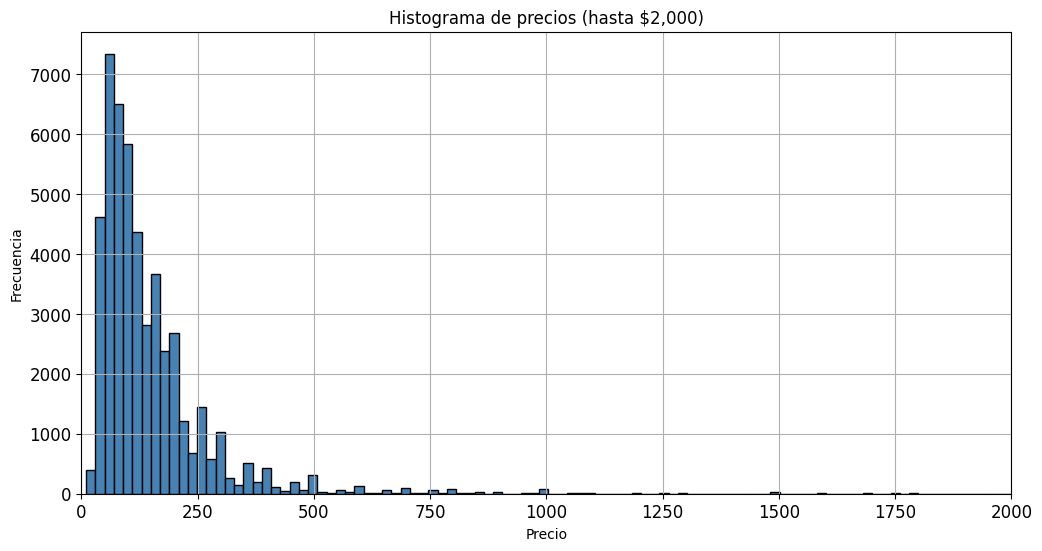

In [70]:
#Realizamos el histograma 

plt.figure(figsize=(12, 6))
df['price'].loc[df['price'] < 2000].hist(bins=100, edgecolor='black', facecolor='steelblue')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios (hasta $2,000)')
plt.xlim(0, 2000)
plt.show()


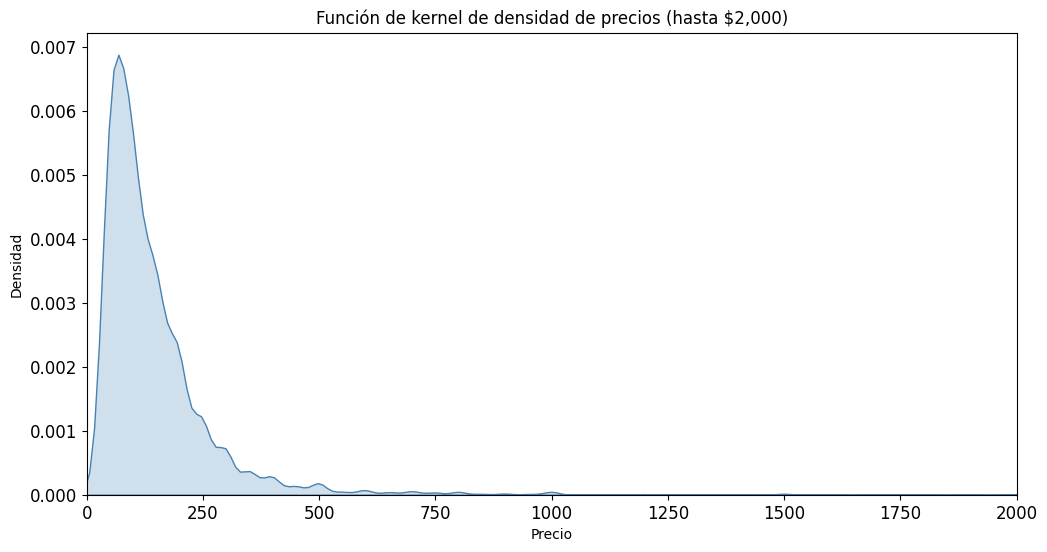

In [71]:
#Realizamos la función de Kernel

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df.loc[df['price'] < 2000], x='price', fill=True, color='steelblue')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.title('Función de kernel de densidad de precios (hasta $2,000)')
plt.xlim(0, 2000)
plt.show()


 A continuación, realizamos los cálculos requeridos para responder las siguientes preguntas: *¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?* y mostramos las respuestas. 

In [72]:
#Respondemos a "¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?":

price_min = df['price'].min()
price_max = df['price'].max()
price_mean = df['price'].mean()
print(f"Precio mínimo: {price_min:.2f}")
print(f"Precio máximo: {price_max:.2f}")
print(f"Precio promedio: {price_mean:.2f}")

price_by_neighborhood = df.groupby('neighbourhood_group_encoded')['price'].mean()
print("\nPrecio medio por 'Neighbourhood group':")
print(price_by_neighborhood)


price_by_room_type = df.groupby('room_type_encoded')['price'].mean()
print("\nPrecio medio por tipo de habitación:")
print(price_by_room_type)

Precio mínimo: 10.00
Precio máximo: 5250.00
Precio promedio: 149.88

Precio medio por 'Neighbourhood group':
neighbourhood_group_encoded
0     87.545037
1    122.878660
2    192.296909
3     97.788628
4    114.812332
Name: price, dtype: float64

Precio medio por tipo de habitación:
room_type_encoded
0    207.603553
1     88.304909
2     70.248705
Name: price, dtype: float64


De los resultados se desprende que el valor medio más alto se da en Manhatta, con USD 197 por alojamiento. A su vez, el precio medio más alto es en aquellos alojamientos que se ofrecen enteros, con un promedio de USD 212.

A continuación, se realizan dos sccaterplots con variables de interés. En el primero, se muestra el precio con la cantidad de noche mínima que requieren los oferentes. En el segundo con la cantidad de anuncios publicados por el oferente.

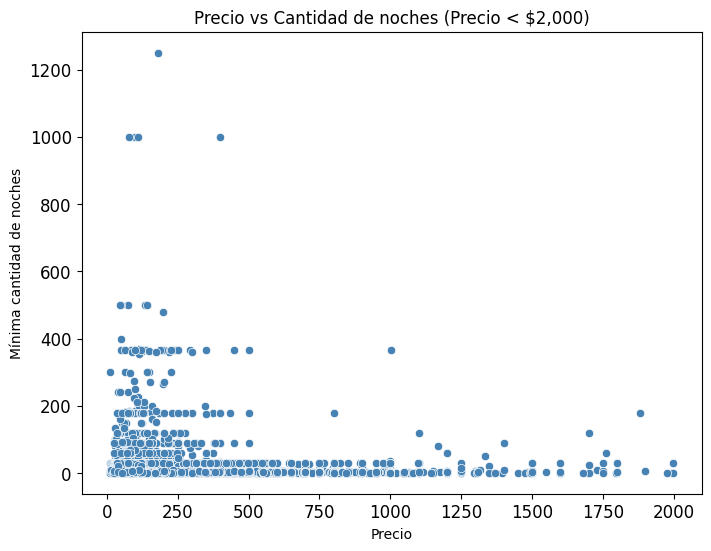

In [73]:
# Con el mismo filtro de Precio < 2000, podemos ver que con precios muy altos no existen valores extremos en la cantidad de noches. Esto puede deberse,
# también, a que la cantidad de observaciones es mucho menor con precios elevados:


plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='minimum_nights', data=df[(df['price'] < 2000)], color='steelblue')
plt.xlabel('Precio')
plt.ylabel('Mínima cantidad de noches')
plt.title('Precio vs Cantidad de noches (Precio < $2,000)')
plt.show()

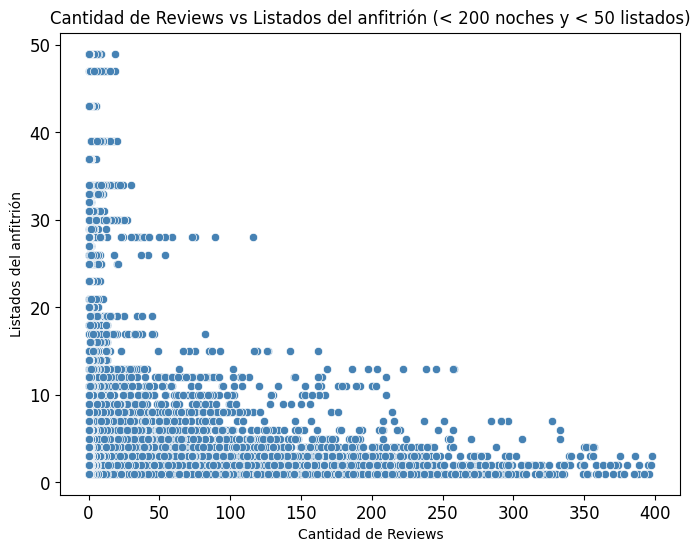

In [74]:
#En este otro scatterplot podemos ver que hay pocos anfitriones con muchos anuncios en Airbnb y a su vez muchos reviews en sus publicaciones:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_reviews', y='calculated_host_listings_count', data=df[(df['number_of_reviews'] < 400) & (df['calculated_host_listings_count'] < 50)], color='steelblue')
plt.xlabel('Cantidad de Reviews')
plt.ylabel('Listados del anfitrión')
plt.title('Cantidad de Reviews vs Listados del anfitrión (< 200 noches y < 50 listados)')
plt.show()

Cómo último paso de esta sección 2, se realiza un análisis de componentes principales para graficar las *ponderaciones* (o *loadings*) de las variables en dos dimensiones (biplot con flechas). 

In [75]:
#Comenzamos importando las funciones necesarias y estandarizando los datos
#pip install scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Seleccionamos sólo las variables numéricas para el PCA
X = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
        'reviews_per_month', 'calculated_host_listings_count', 
        'neighbourhood_group_encoded', 'room_type_encoded']]

#Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Biplot - PCA')

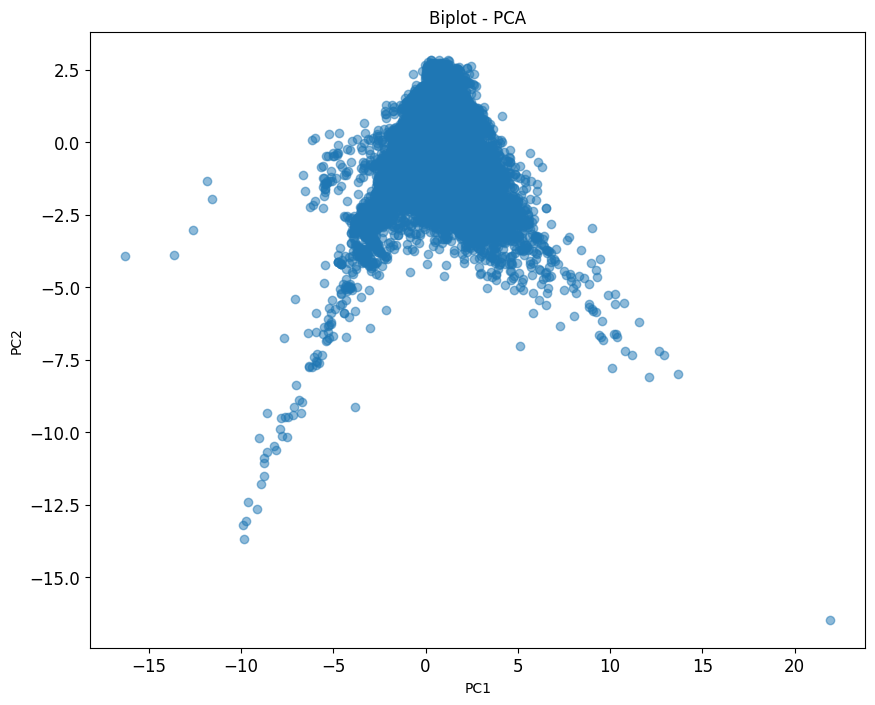

In [76]:
#Aplicamos PCA y reducimos a dos componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Hacemos el biplot
plt.figure(figsize=(10, 8))

#Graficamos las observaciones en el espacio de los dos componentes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot - PCA')

Cómo se desprende del gráfico de componentes principales, la mayoría de los puntos se concentran en el centro del gráfico, formando un patrón triangular o de abanico. El componente principal 1 (PC1) tiene un rango aproximadamente entre -15 y +20, mientras que PC2 varía de -15 a +2.5. Esto sugiere que PC1 capta una mayor parte de la variabilidad que PC2. El hecho de que PC1 tenga un rango mayor sugiere que este componente captura más información de la estructura de los datos originales.

A su vez, la forma triangular o de abanico de la distribución puede indicar que los datos están estructurados de una manera específica y que las variables originales están correlacionadas de forma compleja. Puede ser que haya subgrupos o clústeres en los datos, con una gran densidad en ciertas áreas y una menor densidad en los extremos. Estos puntos más extremos pueden representar valores atípicos o grupos de observaciones con características distintas.

A continuación se calculan los *loadings* o ponderaciones y se grafica.

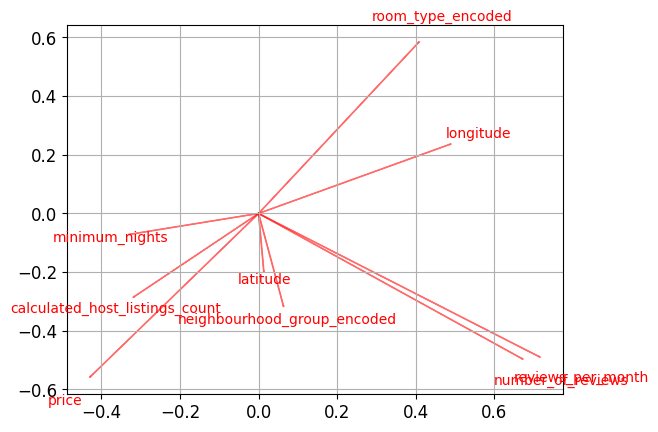

In [77]:
#Ahora, calculamos los *loadings* (ponderaciones)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#Graficamos las ponderaciones como flechas
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='r', ha='center', va='center')

#Se muestran los gráficos
plt.grid()
plt.show()

Como se desprende de este último gráfico, PC1 parece estar influenciado por variables como price y number_of_reviews, ya que estas variables tienen componentes significativos en la dirección de PC1 (horizontal).

PC2 está influenciado por variables como room_type_encoded, que tiene una gran componente en la dirección vertical.

In [78]:
#Mostramos la varianza explicada por los dos primeros componentes
print(f'Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2%}')
print(f'Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2%}')
print(f'Varianza total explicada por los dos componentes: {sum(pca.explained_variance_ratio_):.2%}')

Varianza explicada por el primer componente: 19.52%
Varianza explicada por el segundo componente: 15.67%
Varianza total explicada por los dos componentes: 35.19%


Por último, con este análisis de componentes principales podemos decir que la varianza explicada por el primer componente es de 19,52%, mientras que la varianza explicada por el segundo componente es de 15,67%. En conjunto, ambos componentes explican el 35,19% de la varianza de la variable price.

### Parte III: Predicción y Validación 

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [79]:
# Asignamos NaN a todos los valores de la columna 'price' 
df['price'] = np.nan

# Verificamos los cambios en el DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 48851 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48851 non-null  int64  
 1   neighbourhood_group             48851 non-null  object 
 2   neighbourhood                   48851 non-null  object 
 3   latitude                        48851 non-null  float64
 4   longitude                       48851 non-null  float64
 5   room_type                       48851 non-null  object 
 6   price                           0 non-null      float64
 7   minimum_nights                  48851 non-null  int64  
 8   number_of_reviews               48851 non-null  int64  
 9   reviews_per_month               48851 non-null  float64
 10  calculated_host_listings_count  48851 non-null  int64  
 11  neighbourhood_group_encoded     48851 non-null  int8   
 12  room_type_encoded               48851

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [80]:
from sklearn.model_selection import train_test_split

# Separar la variable dependiente (y) y las independientes (X)
y = df['price']
X = df.drop(columns=['price'])

# Agregar una columna de unos (1) a las variables independientes
X = X.copy()  # Crear una copia para evitar modificar el original
X['ones'] = 1

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Imprimir las dimensiones para verificar
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (34195, 14)
Dimensiones de X_test: (14656, 14)
Dimensiones de y_train: (34195,)
Dimensiones de y_test: (14656,)


#### Ejercicio 9
Implementen una regresión lineal, generen un una tabla para presentar las estimaciones de los coeficientes y comenten los resultados obtenidos.

In [81]:
#Importamos las funciones necesarias

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Cargamos los datos en el DataFrame nuevamente porque habiamos borrado las variables de 'price'
df = pd.read_csv('Base Airbnb NY.csv') 

# Usamos una muestra del 10% para reducir el tamaño de los datos, de otro modo el kernel falla
df_sample = df.sample(frac=0.1, random_state=201)

# Separamos X e y
y = df_sample['price']
X = df_sample.drop(columns=['price'])

# Convertimos variables categóricas en numéricas (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Completamos valores NaN con la media de cada columna
imputador = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputador.fit_transform(X), columns=X.columns)

# Agregamos una columna de unos para el término constante en la regresión
X['ones'] = 1

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Creamos y ajustamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtenemos los coeficientes e intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Creamos una tabla para presentar los coeficientes
tabla_coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coeficientes
})

# Agregamos el intercepto como una fila adicional en la tabla usando pd.concat
intercepto_df = pd.DataFrame({'Variable': ['Intercepto'], 'Coeficiente': [intercepto]})
tabla_coeficientes = pd.concat([tabla_coeficientes, intercepto_df], ignore_index=True)

# Imprimimos la tabla de coeficientes
print("Tabla de estimaciones de los coeficientes:")
print(tabla_coeficientes)

# Análisis de la tabla de coeficientes:

# Los resultados muestran cómo cada variable influye en el precio de las propiedades en Airbnb.

# 1. Variables Principales:
#    - `latitude` (-6.32): Un coeficiente negativo indica que las propiedades ubicadas más al sur tienen precios ligeramente más bajos.
#    - `longitude` (-1.19): Las propiedades más al oeste tienden a tener precios más bajos, aunque el impacto es moderado.
#    - `minimum_nights` (-2.07): Aumentar el número mínimo de noches tiene un efecto negativo en el precio, aunque el impacto es pequeño.

# 2. Variables de Identificación:
#    - `id` (-3.74e-07) y `host_id` (1.27e-07) tienen coeficientes extremadamente pequeños, lo que indica que no afectan el precio significativamente.

# 3. Variables Categóricas:
#    - `last_review` (por ejemplo, `last_review_2019-07-06` con -2.099 y `last_review_2019-07-08` con -4.857): Algunas fechas de la última reseña tienen un efecto leve en el precio.

# 4. Intercepto:
#    - El intercepto (-8.3979) representa el valor base del precio cuando todas las variables son cero. Sin embargo, un valor negativo para el precio carece de interpretación práctica directa.

# Conclusión:
# El modelo muestra que la ubicación (latitud y longitud) y algunas características relacionadas con las reseñas influyen en el precio de las propiedades. 
# No obstante, muchas variables tienen un impacto limitado, lo que sugiere que simplificar el modelo eliminando algunas variables podría mejorar su interpretabilidad.

Tabla de estimaciones de los coeficientes:
                    Variable   Coeficiente
0                         id -3.735362e-07
1                    host_id  1.272818e-07
2                   latitude -6.468451e+00
3                  longitude -1.194301e+02
4             minimum_nights -2.066946e-01
...                      ...           ...
8526  last_review_2019-07-06 -2.099106e+01
8527  last_review_2019-07-07 -1.079172e+01
8528  last_review_2019-07-08 -4.857779e+01
8529                    ones  0.000000e+00
8530              Intercepto -8.394616e+03

[8531 rows x 2 columns]


#### Ejercicio 10: Predicción afuera de la muestra
Calcule el Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE), y el Error Absoluto Medio (MAE) en la base de entrenamiento y testeo (usando coeficientes estimados con la base de entrenamiento). Presente los resultados en una tabla y comente las diferencias de calcular estas medidas de bondad de ajuste adentro y afuera de la muestra

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Restablecer los índices de X_test y y_test para garantizar alineación
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Eliminar filas con NaN en y_test y sincronizar X_test con las filas restantes
y_test_clean = y_test.dropna()  # Eliminar NaN en y_test
X_test_clean = X_test.loc[y_test_clean.index]  # Seleccionar solo las filas correspondientes en X_test

# Realizar predicciones en la base de entrenamiento y prueba
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test_clean)

# Calcular MSE, RMSE y MAE en la base de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calcular MSE, RMSE y MAE en la base de prueba
mse_test = mean_squared_error(y_test_clean, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_clean, y_test_pred)

# Crear una tabla con los resultados
resultados = pd.DataFrame({
    "Métrica": ["MSE", "RMSE", "MAE"],
    "Entrenamiento": [mse_train, rmse_train, mae_train],
    "Prueba": [mse_test, rmse_test, mae_test]
})

# Imprimir la tabla de resultados
print("Tabla de métricas de error:")
print(resultados)

# Análisis de resultados de las métricas de error:

# Las métricas de error muestran una gran diferencia entre el ajuste del modelo en los datos de entrenamiento y prueba:
# - **MSE, RMSE y MAE** son extremadamente bajos en el conjunto de entrenamiento, indicando un ajuste casi perfecto dentro de la muestra.
# - Sin embargo, en el conjunto de prueba, estos valores son mucho más altos, lo cual sugiere que el modelo no generaliza bien a datos nuevos.

# Conclusión:
# La discrepancia entre las métricas de entrenamiento y prueba indica que el modelo podría estar sobreajustado (overfitting). 
# Aunque el modelo funciona bien dentro de la muestra, su rendimiento fuera de la muestra es deficiente, por lo que sería recomendable simplificar el modelo o aplicar 
# regularización para mejorar su capacidad de generalización.

Tabla de métricas de error:
  Métrica  Entrenamiento         Prueba
0     MSE   2.081071e-08  101647.513752
1    RMSE   1.442592e-04     318.822072
2     MAE   1.011099e-04      88.250354
